### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('240304 Training Assignment Dataset - Copy.csv')

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0
4,5,Female,29.0,NaN,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0
381105,381106,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0
381106,381107,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0
381107,381108,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0


In [4]:
df.shape

(381109, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                378700 non-null  object 
 2   Age                   378590 non-null  float64
 3   Driving_License       377925 non-null  float64
 4   Region_Code           377876 non-null  float64
 5   Previously_Insured    377901 non-null  float64
 6   Vehicle_Age           377651 non-null  object 
 7   Vehicle_Damage        377833 non-null  object 
 8   Annual_Premium        377943 non-null  float64
 9   Policy_Sales_Channel  379154 non-null  float64
 10  Vintage               381014 non-null  float64
 11  Response              381109 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,378590.00000,377925.000000,377876.000000,377901.000000,377943.000000,379154.000000,381014.000000,381109.000000
mean,190555.000000,38.81855,0.997867,26.393619,0.458178,30563.769928,112.040878,154.344021,0.122563
std,110016.836208,15.50903,0.046132,13.230413,0.498249,17216.943211,54.200731,83.672192,0.327936
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.00000,1.000000,15.000000,0.000000,24406.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.00000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.00000,1.000000,35.000000,1.000000,39397.000000,152.000000,227.000000,0.000000
max,381109.000000,85.00000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48746
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [8]:
df.isna().sum()

id                         0
Gender                  2409
Age                     2519
Driving_License         3184
Region_Code             3233
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Vintage                   95
Response                   0
dtype: int64

In [9]:
df.dtypes

id                        int64
Gender                   object
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
Response                  int64
dtype: object

### univariate analysis

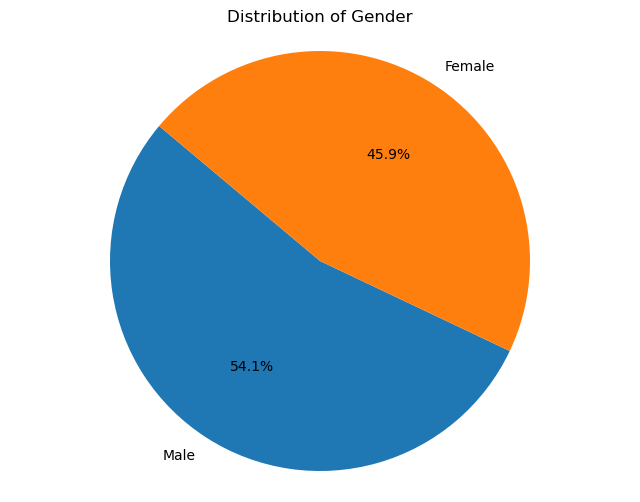

In [10]:
#total distribution of gender
import matplotlib.pyplot as plt
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()

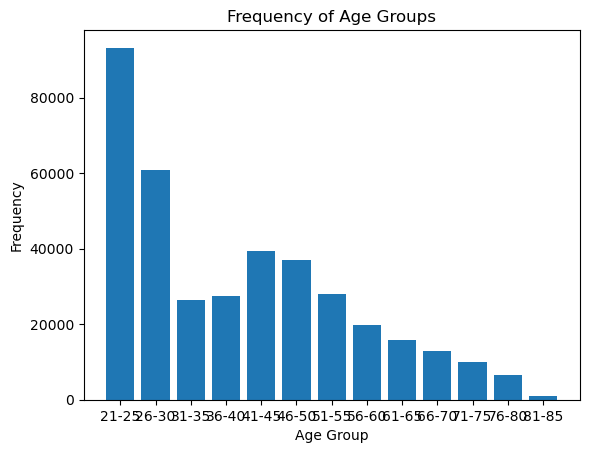

In [11]:
#distribution of age group 
bin_edges = np.arange(20, 86, 5)  # Bin edges from 20 to 80 with a step of 10

frequencies, _ = np.histogram(df['Age'], bins=bin_edges)

plt.bar(range(len(frequencies)), frequencies, align='center', tick_label=[f'{edge+1}-{edge+5}' for edge in bin_edges[:-1]])
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Frequency of Age Groups')
plt.show()

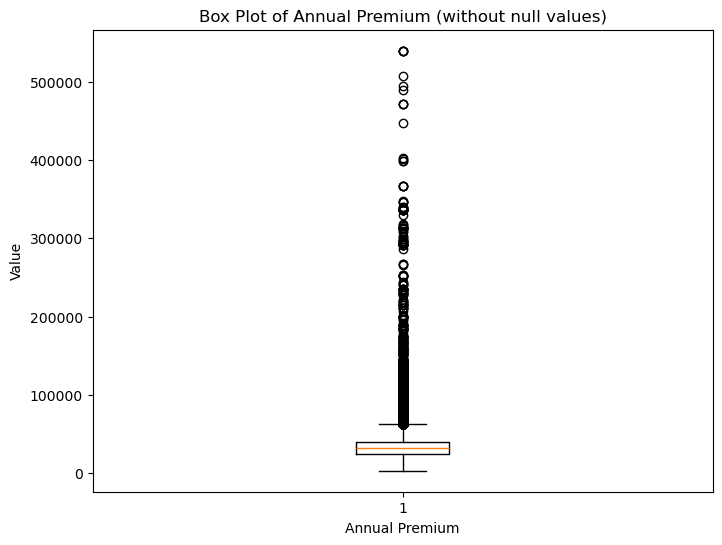

In [12]:
#outliers in annual premium
df_cleaned = df.dropna(subset=['Annual_Premium'])

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['Annual_Premium'])
plt.xlabel('Annual Premium')
plt.ylabel('Value')
plt.title('Box Plot of Annual Premium (without null values)')
plt.show()

Response
0    334399
1     46710
Name: count, dtype: int64
[0.1, 0]


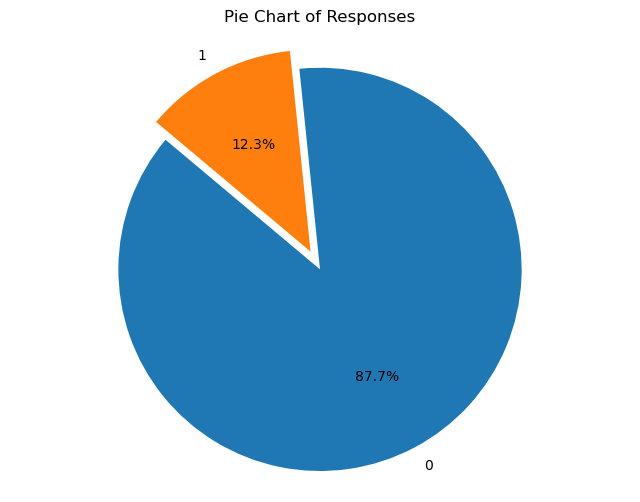

In [13]:
#distribution of response
response_counts = df['Response'].value_counts()
print(response_counts)

explosions = [0.1 if count == response_counts.max() else 0 for count in response_counts]

print(explosions)
plt.figure(figsize=(8, 6))
plt.pie(response_counts, labels=response_counts.index, explode=explosions, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Responses')
plt.axis('equal')
plt.show()

C:\Users\ArjunP\AppData\Local\Temp\ipykernel_13852\3037097808.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  response_counts = df['Region_Code'].value_counts()[:10]


Region_Code
28.0    105527
8.0      33590
46.0     19603
41.0     18127
15.0     13191
30.0     12095
29.0     10960
50.0     10162
11.0      9162
3.0       9157
36.0      8715
33.0      7590
47.0      7376
35.0      6869
6.0       6229
45.0      5561
37.0      5460
18.0      5098
48.0      4644
14.0      4641
39.0      4606
10.0      4337
Name: count, dtype: int64
[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


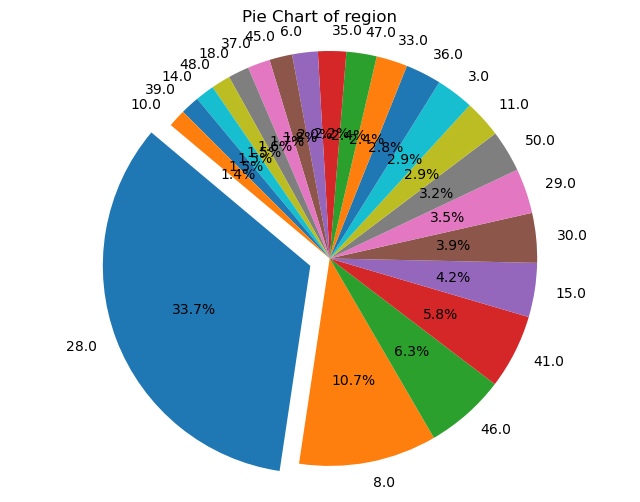

In [14]:
#distribution of region code
response_counts = df['Region_Code'].value_counts()[:10]
print(response_counts)

explosions = [0.1 if count == response_counts.max() else 0 for count in response_counts]

print(explosions)
plt.figure(figsize=(8, 6))
plt.pie(response_counts, labels=response_counts.index, explode=explosions, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of region')
plt.axis('equal')
plt.show()

### Bivariate analysis

In [15]:
#gender and its vehicle damage distribution
cross_tab = pd.crosstab(df['Gender'], df['Vehicle_Damage'])
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

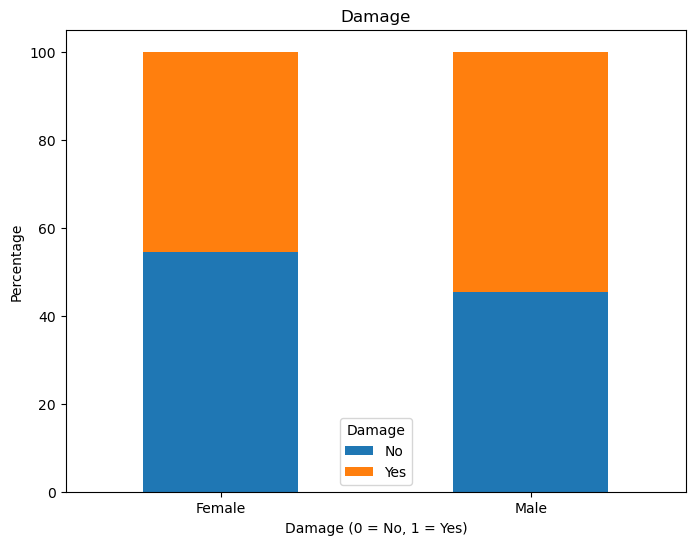

In [16]:
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Damage')
plt.xlabel('Damage (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Damage')
plt.show()

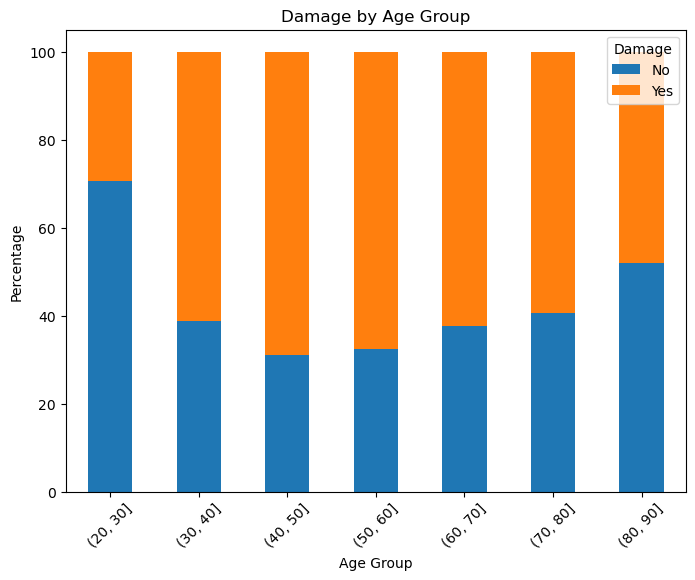

In [17]:
#age group damage distribution
age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

# Create cross-tabulation
cross_tab = pd.crosstab(age_bins, df['Vehicle_Damage'])
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Damage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Damage')
plt.show()

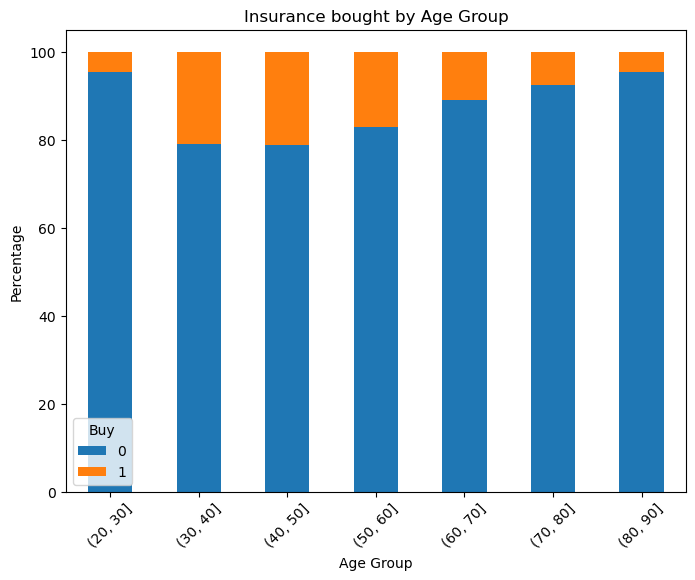

In [18]:
#insurance distribution based on age group
age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

# Create cross-tabulation
cross_tab = pd.crosstab(age_bins, df['Response'])
cross_tab_percent = cross_tab.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar chart
cross_tab_percent.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Insurance bought by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Buy')
plt.show()

Response                 0      1
Previously_Insured               
0.0                 158610  46145
1.0                 172988    158


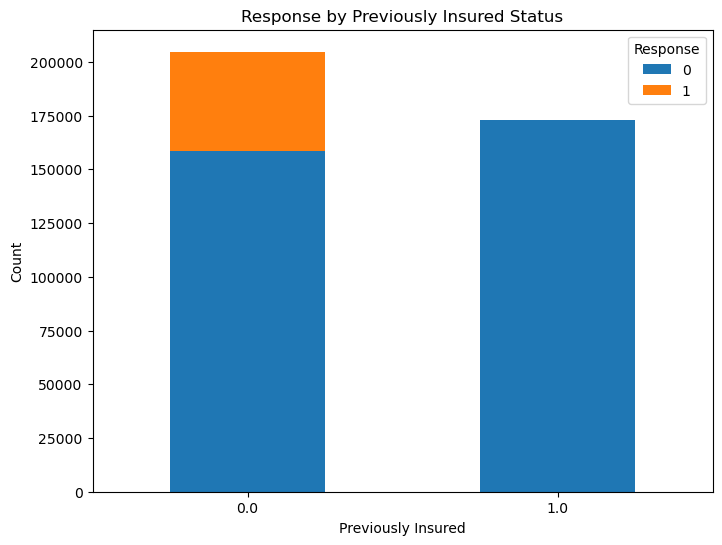

In [19]:
#previously insured and response comparision
contingency_table = pd.crosstab(df['Previously_Insured'], df['Response'])
print(contingency_table)
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Response by Previously Insured Status')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response')
plt.show()

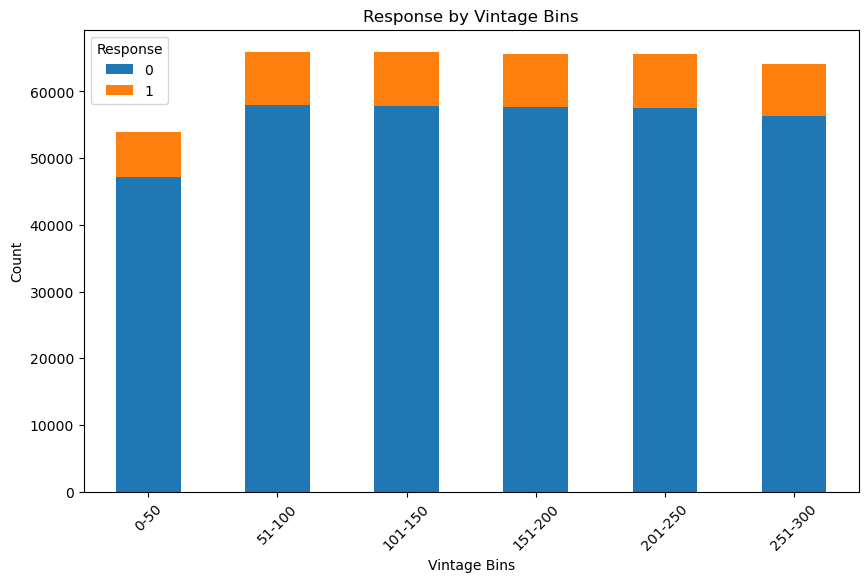

In [20]:
#response based on vintage
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

df['Vintage_bins'] = pd.cut(df['Vintage'], bins=bin_edges, labels=['0-50', '51-100', '101-150', '151-200', 
                                                                    '201-250', '251-300', '301-350', '351-400',
                                                                    '401-450', '451-500'])


contingency_table = pd.crosstab(df['Vintage_bins'], df['Response'])

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response by Vintage Bins')
plt.xlabel('Vintage Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()

Index([152.0, 26.0, 124.0, 160.0, 156.0, 122.0, 157.0, 154.0, 151.0, 163.0], dtype='float64', name='Policy_Sales_Channel')


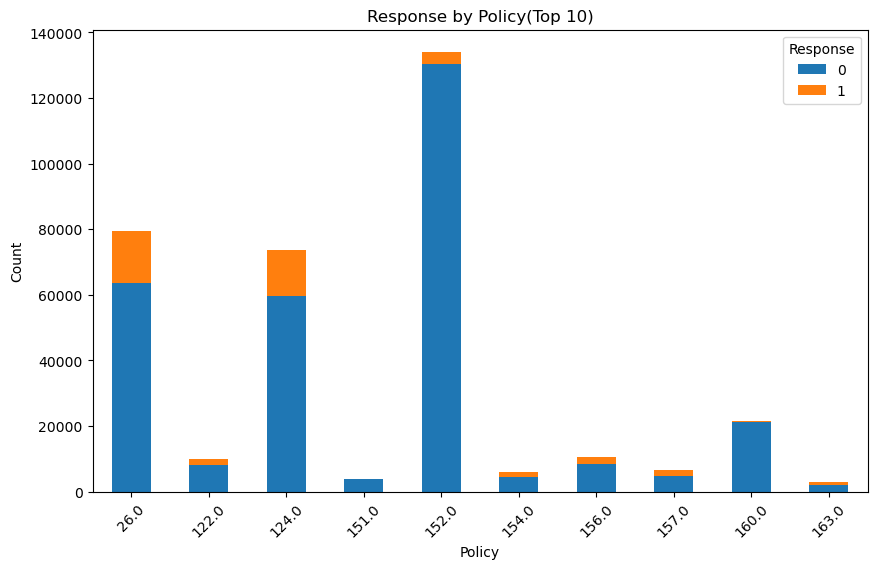

In [21]:
#response based on policy sales channel
top_bins = df['Policy_Sales_Channel'].value_counts().head(10).index

print(top_bins)
df_top_bins = df[df['Policy_Sales_Channel'].isin(top_bins)]
contingency_table = pd.crosstab(df_top_bins['Policy_Sales_Channel'], df_top_bins['Response'])

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Response by Policy(Top 10)')
plt.xlabel('Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()

### Multivaritte analasis

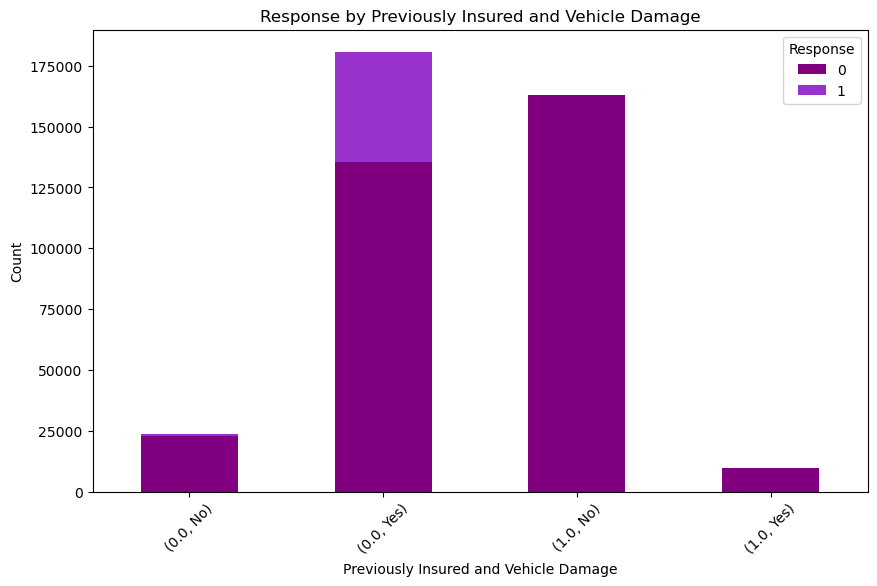

In [22]:
#response based on vehicle damage and previous insured status
import matplotlib.pyplot as plt

# Generate contingency table
contingency_table = pd.crosstab(index=[df['Previously_Insured'], df['Vehicle_Damage']], columns=df['Response'])

# Plot stacked bar chart with purple and its shade colors
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#800080', '#9932CC', '#8A2BE2'])
plt.title('Response by Previously Insured and Vehicle Damage')
plt.xlabel('Previously Insured and Vehicle Damage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.show()


In [23]:
#encoding the categorical data
cleanup = {
    "Gender" : {"Male":0,"Female":1},
    "Vehicle_Age":{"> 2 Years":0,"1-2 Year":1,"< 1 Year":2},
    "Vehicle_Damage":{"No":0,"Yes":1}
}

df = df.replace(cleanup)


### Feature engineering

{'Gender': 1048.185847194809, 'Age': 21090.641797441505, 'Driving_License': 37.90590899290648, 'Region_Code': 7179.505365934883, 'Previously_Insured': 43958.16156138119, 'Vehicle_Age': 18614.662562347752, 'Vehicle_Damage': 47460.18262034989, 'Annual_Premium': 52187.14970917017, 'Policy_Sales_Channel': 26313.107728448893, 'Vintage': 260.1999561252899, 'Vintage_bins': 5.845966733668776}


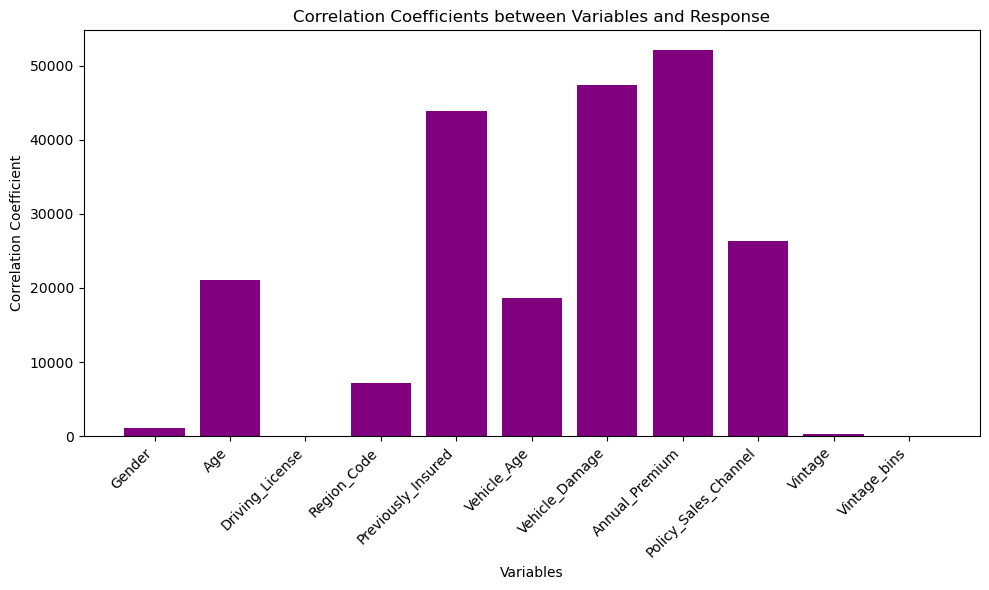

In [24]:
#finding the chi2 contigency
columns = df.columns.tolist()
columns.remove('id')
columns.remove('Response')

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Vintage'], df['Response']).to_numpy()

contingency_table

chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)

#creating a dict to store chi values for all features
final_chi_corr = {}

for feature in columns:
    df_cleaned = df.dropna(subset=[feature])
    contingency_table = pd.crosstab(df_cleaned[feature], df_cleaned['Response']).to_numpy()
    chi2_statistic, pval, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table)
    final_chi_corr[feature] = chi2_statistic

print(final_chi_corr)

variables = list(final_chi_corr.keys())
correlation_values = list(final_chi_corr.values())

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(variables, correlation_values, color='purple')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Variables and Response')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the bar chart
plt.show()

In [25]:
#removing featuers that are not required
df = df.drop(columns=['Gender','Driving_License','Vintage','Vintage_bins'])
df = df.drop(columns=['Region_Code'])

In [26]:
from sklearn import preprocessing 
le_ag = preprocessing.LabelEncoder() 

df['age_group'] = age_bins = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90])

df['age_group'] = le_ag.fit_transform(df['age_group'])

df

,id,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,age_group
0,1,44.0,0.0,0.0,1.0,40454.0,26.0,1,2
1,2,76.0,0.0,1.0,0.0,33536.0,26.0,0,5
2,3,47.0,0.0,0.0,1.0,38294.0,26.0,1,2
3,4,21.0,1.0,2.0,0.0,28619.0,152.0,0,0
4,5,29.0,1.0,2.0,0.0,27496.0,152.0,0,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74.0,1.0,1.0,0.0,30170.0,26.0,0,5
381105,381106,30.0,1.0,2.0,0.0,40016.0,152.0,0,0
381106,381107,21.0,1.0,2.0,0.0,35118.0,160.0,0,0
381107,381108,68.0,0.0,0.0,1.0,44617.0,124.0,0,4


In [27]:
df.isnull().sum()

id                         0
Age                     2519
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
age_group                  0
dtype: int64

In [28]:
#filling vehicle damage null vals
print(df['Age'].value_counts())
print(df[df['Vehicle_Damage']==1.0]['Age'].value_counts())
df[df['Vehicle_Damage']==0.0]['Age'].value_counts()

Age
24.0    25792
23.0    24098
22.0    20847
25.0    20502
21.0    16338
        ...  
81.0       56
82.0       29
83.0       22
84.0       11
85.0       11
Name: count, Length: 66, dtype: int64
Age
21.0    7261
22.0    7083
23.0    6914
24.0    6606
43.0    5782
        ... 
81.0      30
82.0      13
83.0      10
85.0       7
84.0       2
Name: count, Length: 66, dtype: int64


Age
24.0    19103
23.0    17127
25.0    15698
22.0    13698
26.0    10519
        ...  
81.0       26
82.0       16
83.0       12
84.0        9
85.0        4
Name: count, Length: 66, dtype: int64

In [29]:
#filling age null vals
def fill_age_full(row):
    if pd.isnull(row['Age']):
        if row['Vehicle_Damage'] == 1.0:
            return 21.0
        elif row['Vehicle_Damage'] == 0.0:
            return 24.0
        else:
            return 24.0
    else:
        return row['Age']

df['Age'] = df.apply(fill_age_full,axis=1)

df

,id,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,age_group
0,1,44.0,0.0,0.0,1.0,40454.0,26.0,1,2
1,2,76.0,0.0,1.0,0.0,33536.0,26.0,0,5
2,3,47.0,0.0,0.0,1.0,38294.0,26.0,1,2
3,4,21.0,1.0,2.0,0.0,28619.0,152.0,0,0
4,5,29.0,1.0,2.0,0.0,27496.0,152.0,0,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74.0,1.0,1.0,0.0,30170.0,26.0,0,5
381105,381106,30.0,1.0,2.0,0.0,40016.0,152.0,0,0
381106,381107,21.0,1.0,2.0,0.0,35118.0,160.0,0,0
381107,381108,68.0,0.0,0.0,1.0,44617.0,124.0,0,4


In [30]:
df.isnull().sum()

id                         0
Age                        0
Previously_Insured      3208
Vehicle_Age             3458
Vehicle_Damage          3276
Annual_Premium          3166
Policy_Sales_Channel    1955
Response                   0
age_group                  0
dtype: int64

In [31]:
#filling previously insured
def fill_previously_insured_full(row):
    if pd.isnull(row['Previously_Insured']):
        if row['Response'] == 0:
            if row['Vehicle_Damage'] == 0.0:
                return 1.0
            elif row['Vehicle_Damage'] == 1.0:
                return 0.0
            else:
                return 0.0
        else:
            return 0.0
    else:
        return row['Previously_Insured']
    

df['Previously_Insured'] = df.apply(fill_previously_insured_full,axis=1)
        
        


In [32]:
print(minn:=df['Annual_Premium'].min(),maxx:=df['Annual_Premium'].max())

df[df['Annual_Premium']==minn]['Policy_Sales_Channel'].value_counts()

df[df['Annual_Premium']==maxx]['Policy_Sales_Channel'].value_counts()


2630.0 540165.0


Policy_Sales_Channel
156.0    1
26.0     1
42.0     1
124.0    1
Name: count, dtype: int64

In [33]:
#filling policy sales channel
print(df['Policy_Sales_Channel'].unique())
df['Policy_Sales_Channel'].fillna(0.0,inplace=True)

[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  nan  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83.  19. 136.  24.  18.  56.
  48. 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140.
 107. 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92.
 111. 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94.
 132.  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95.
 123.  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.
  58.  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.
  79. 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144.
 143.  41.]


In [34]:
#filling vehicle damage
def fill_damage_full(row):
    if pd.isnull(row['Vehicle_Damage']):
        if row['Response'] == 1.0:
            return 1.0
        else:
            return 1.0
    else:
        return row['Vehicle_Damage']
    

df['Vehicle_Damage'] = df.apply(fill_damage_full,axis=1)

df.isna().sum()

id                         0
Age                        0
Previously_Insured         0
Vehicle_Age             3458
Vehicle_Damage             0
Annual_Premium          3166
Policy_Sales_Channel       0
Response                   0
age_group                  0
dtype: int64

In [35]:
#filling age
df['Vehicle_Age'].fillna(df['Vehicle_Age'].mode()[0],inplace=True)

In [36]:
#filling annual premium
from sklearn.linear_model import LinearRegression
df_non_nan = df.dropna()

X = df_non_nan.drop('Annual_Premium',axis=1)
X = X.drop('id',axis=1)
Y = df_non_nan['Annual_Premium']

categorical_cols = X.columns

print(categorical_cols)

lr = LinearRegression()
lr.fit(X, Y)

def fill_annual_premium_full(row):
    col_vals = []
    if pd.isnull(row['Annual_Premium']):
        for col in categorical_cols:
            col_vals.append(row[col])
        premium = round(lr.predict([col_vals])[0],0)
        return premium
    else:
        return row['Annual_Premium']

df['Annual_Premium'] = df.apply(fill_annual_premium_full,axis=1)


Index(['Age', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Response', 'age_group'],
      dtype='object')


c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\ArjunP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does 

In [37]:
df.isna().sum()

id                      0
Age                     0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Response                0
age_group               0
dtype: int64

In [38]:
df.to_csv('refined.csv')

### Model training and prediction

In [39]:
df = pd.read_csv('refined.csv')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [41]:
df = df.drop('id',axis=1)
df = df.drop('Age',axis=1)

In [42]:
df = df.drop("Unnamed: 0",axis=1)

In [53]:
class train:
    def __init__(self,df):
        self.model_names = []
        self.accuracy_list = []
        self.precision_list = []
        self.recall_list = []
        self.shap_values_dict = {}

        self.models = {
            "RandomForest":RandomForestClassifier(max_depth=7,n_estimators=150),
            "LogisticREgression":LogisticRegression(C=0.01),
            "DecisionTree":DecisionTreeClassifier(max_depth=11),
            "KNN":KNeighborsClassifier(n_neighbors=5),
            "XGBoost":xgb.XGBClassifier(learning_rate=0.5, n_estimators=150)
        }

        self.X = df.drop('Response', axis=1)
        self.y = df['Response']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2)
        self.smote = SMOTE(random_state=42)
        self.X_train, self.y_train = self.smote.fit_resample(self.X_train, self.y_train)

    def fit(self):

        for i, (k, v) in enumerate(self.models.items()):
            print(f"Running model {k}")
            print(k,v)
            model = v

            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)

            accuracy = accuracy_score(self.y_test, y_pred)
            precision = precision_score(self.y_test, y_pred)
            recall = recall_score(self.y_test, y_pred)

            self.model_names.append(k)
            self.accuracy_list.append(accuracy)
            self.precision_list.append(precision)
            self.recall_list.append(recall)

            try:
                explainer = shap.Explainer(model)
                shap_values = explainer.shap_values(self.X_test)
                self.shap_values_dict[k] = shap_values
            except:
                print(f"shap dosent work for {model}")

            print(f"Accuracy for {k}:", accuracy)
            print(f"Precision for {k}:", precision)
            print(f"Recall for {k}:", recall)

            print(classification_report(self.y_test, y_pred))
    
    def performance(self):
        plt.figure(figsize=(10, 6))

        plt.plot(self.model_names, self.accuracy_list, marker='o', label='Accuracy')

        plt.plot(self.model_names, self.precision_list, marker='o', label='Precision')

        plt.plot(self.model_names, self.recall_list, marker='o', label='Recall')

        plt.xlabel('Model Names')
        plt.ylabel('Score')
        plt.title('Model Performance')
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def explain(self):
        for model_name, shap_values in self.shap_values_dict.items():
            print(f"Generating SHAP summary plot for {model_name}...")
            shap.summary_plot(shap_values, self.X_test, show=False, plot_type='bar')
            plt.title(f'SHAP Summary Plot for {model_name}')
            plt.show()


    

In [54]:
training = train(df)
training.fit()


Running model RandomForest
RandomForest RandomForestClassifier(max_depth=7, n_estimators=150)
Accuracy for RandomForest: 0.7532995723019601
Precision for RandomForest: 0.31169094671914943
Recall for RandomForest: 0.8065735587524939
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     66699
           1       0.31      0.81      0.45      9523

    accuracy                           0.75     76222
   macro avg       0.64      0.78      0.65     76222
weighted avg       0.88      0.75      0.79     76222

Running model LogisticREgression
LogisticREgression LogisticRegression(C=0.01)
shap dosent work for LogisticRegression(C=0.01)
Accuracy for LogisticREgression: 0.6709349006848416
Precision for LogisticREgression: 0.2653738275477275
Recall for LogisticREgression: 0.9239735377507088
              precision    recall  f1-score   support

           0       0.98      0.63      0.77     66699
           1       0.27      0.92      0.41      9

Generating SHAP summary plot for RandomForest...


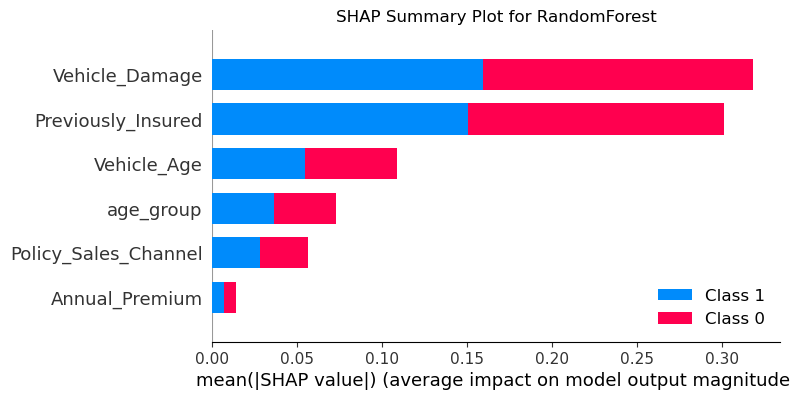

Generating SHAP summary plot for DecisionTree...


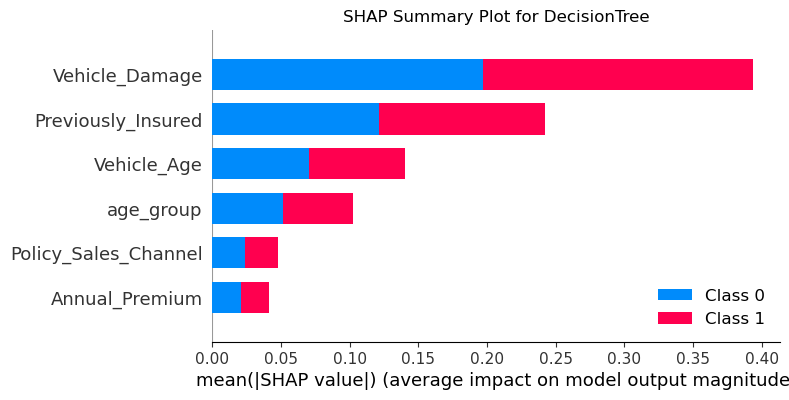

Generating SHAP summary plot for XGBoost...


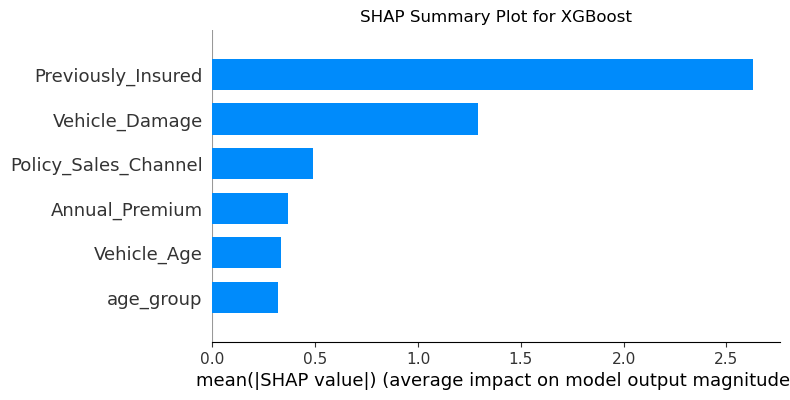

In [55]:
training.explain()

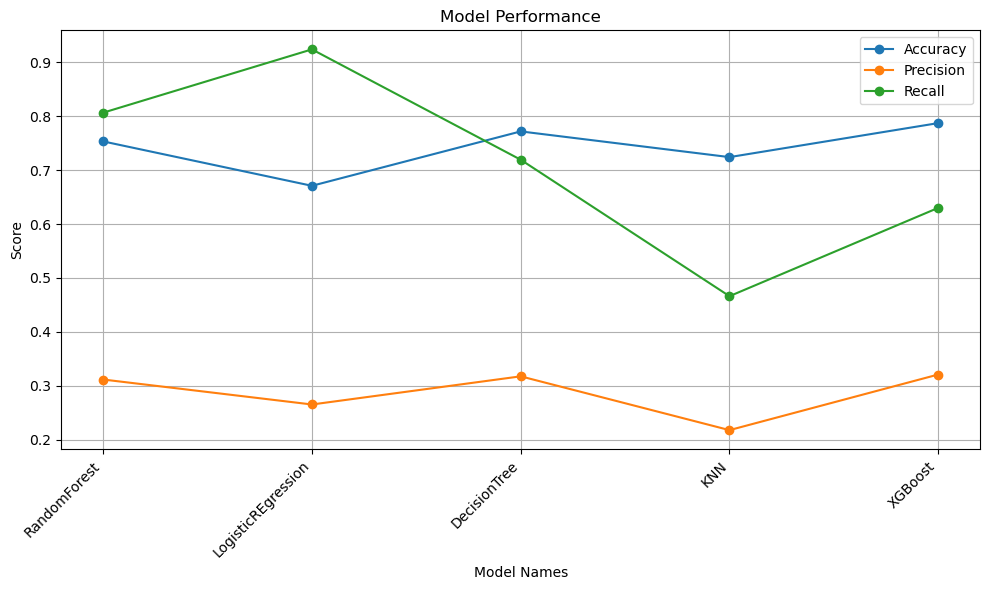

In [56]:
training.performance()